Data Cleaning Project
---



----
Author - Sarama

### Import the required libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 

import seaborn as sns
from datetime import datetime
import itertools
import datetime
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Setting pandas and plt configs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

params = {'legend.fontsize': '20',
          'figure.figsize': (15, 5),
         'axes.labelsize': '18',
         'axes.titlesize':'30',
         'xtick.labelsize':'16',
         'ytick.labelsize':'16'}
plt.rcParams.update(params)

plt.rcParams['text.color'] = '#A04000'
plt.rcParams['xtick.color'] = '#800000'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'

In [2]:
import os

for root, dirs, files in os.walk('data/'):
    for filename in files:
        print(filename)

EdStatsCountry-Series.csv
EdStatsCountry.csv
EdStatsData.csv
EdStatsFootNote.csv
EdStatsSeries.csv
Edstats_csv.zip


### Loading the data

In [3]:
country_series = pd.read_csv('data/EdStatsCountry-Series.csv')
country = pd.read_csv('data/EdStatsCountry.csv')
data = pd.read_csv('data/EdStatsData.csv')
footnote = pd.read_csv('data/EdStatsFootNote.csv')
series = pd.read_csv('data/EdStatsSeries.csv')

In [4]:
print("Shape of dataframe : ", country_series.shape)
country_series.head()

Shape of dataframe :  (613, 4)


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [5]:
print("Shape of dataframe : ", country.shape)
country.head()

Shape of dataframe :  (241, 32)


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [6]:
print("Shape of dataframe : ", data.shape)
data.head()

Shape of dataframe :  (886930, 70)


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("Shape of dataframe : ", footnote.shape)
footnote.head()

Shape of dataframe :  (643638, 5)


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [8]:
print("Shape of dataframe : ", series.shape)
series.head()

Shape of dataframe :  (3665, 21)


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(country_series.shape)
print(country.shape)
print(data.shape)
print(footnote.shape)
print(series.shape)

(613, 4)
(241, 32)
(886930, 70)
(643638, 5)
(3665, 21)


## Check for missing values in each dataframe

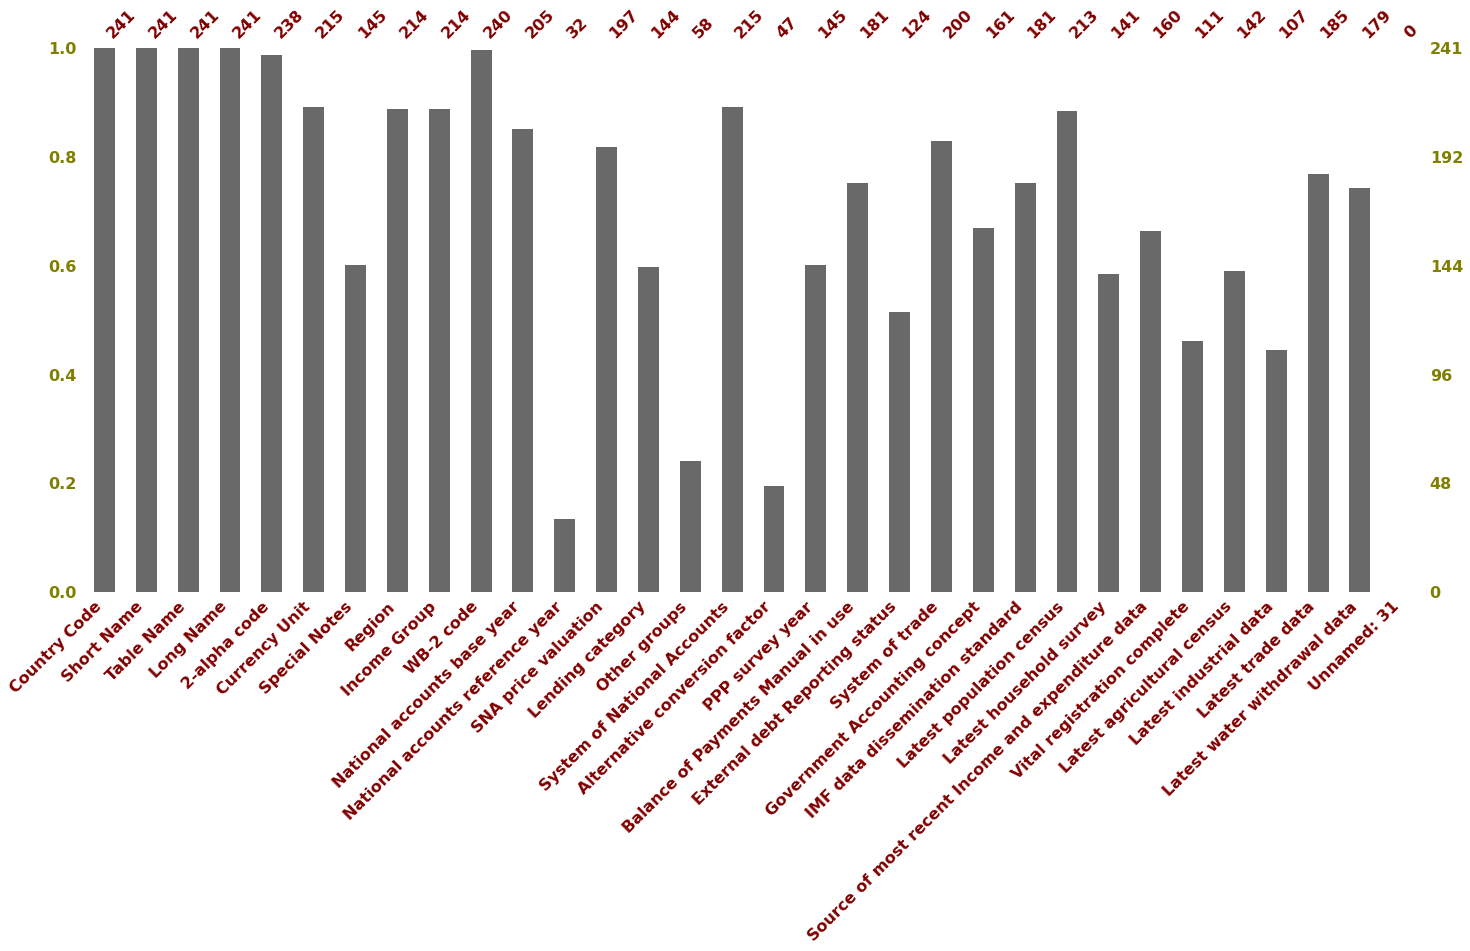

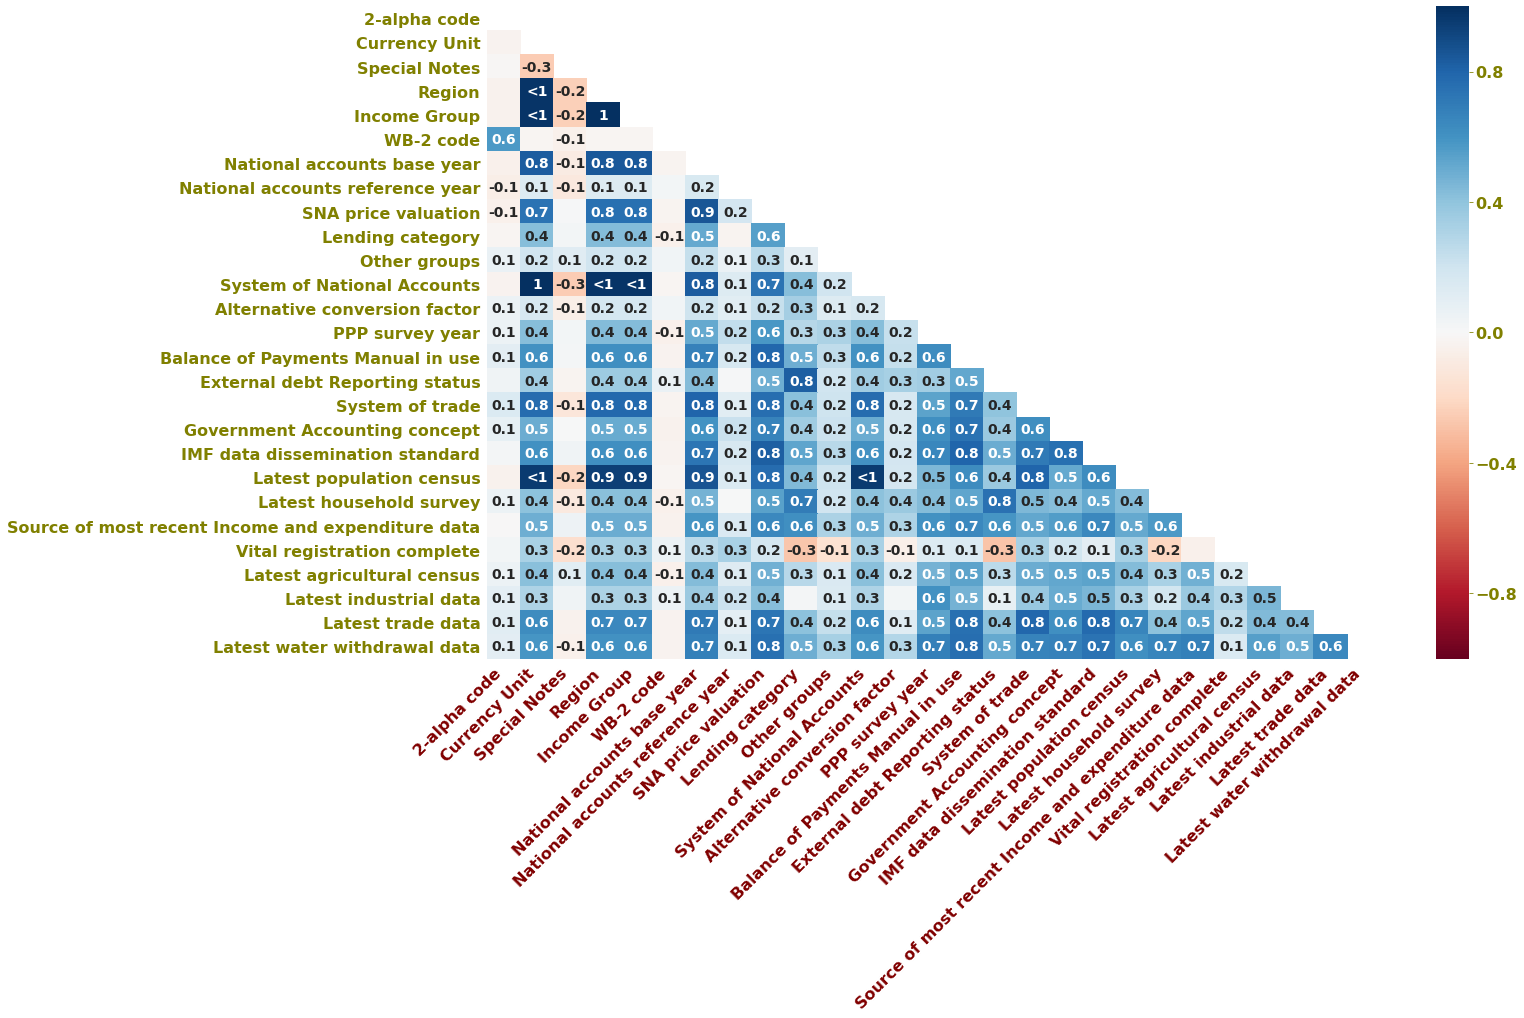

In [10]:
msno.bar(country)
msno.heatmap(country);

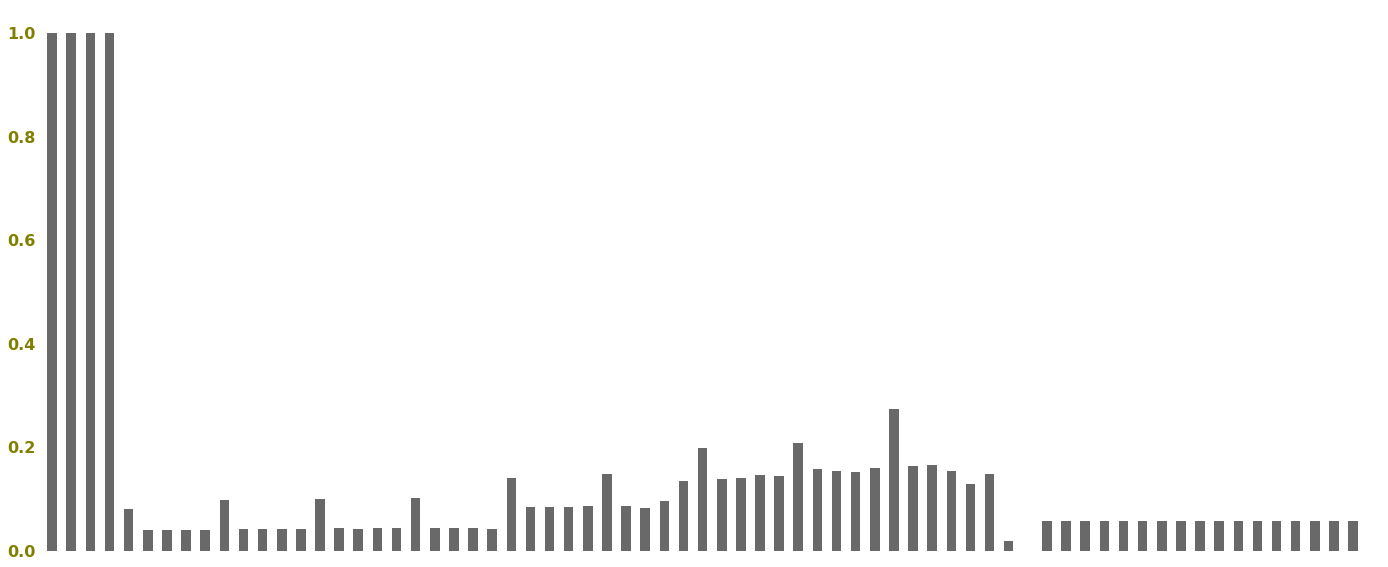

In [11]:
msno.bar(data);

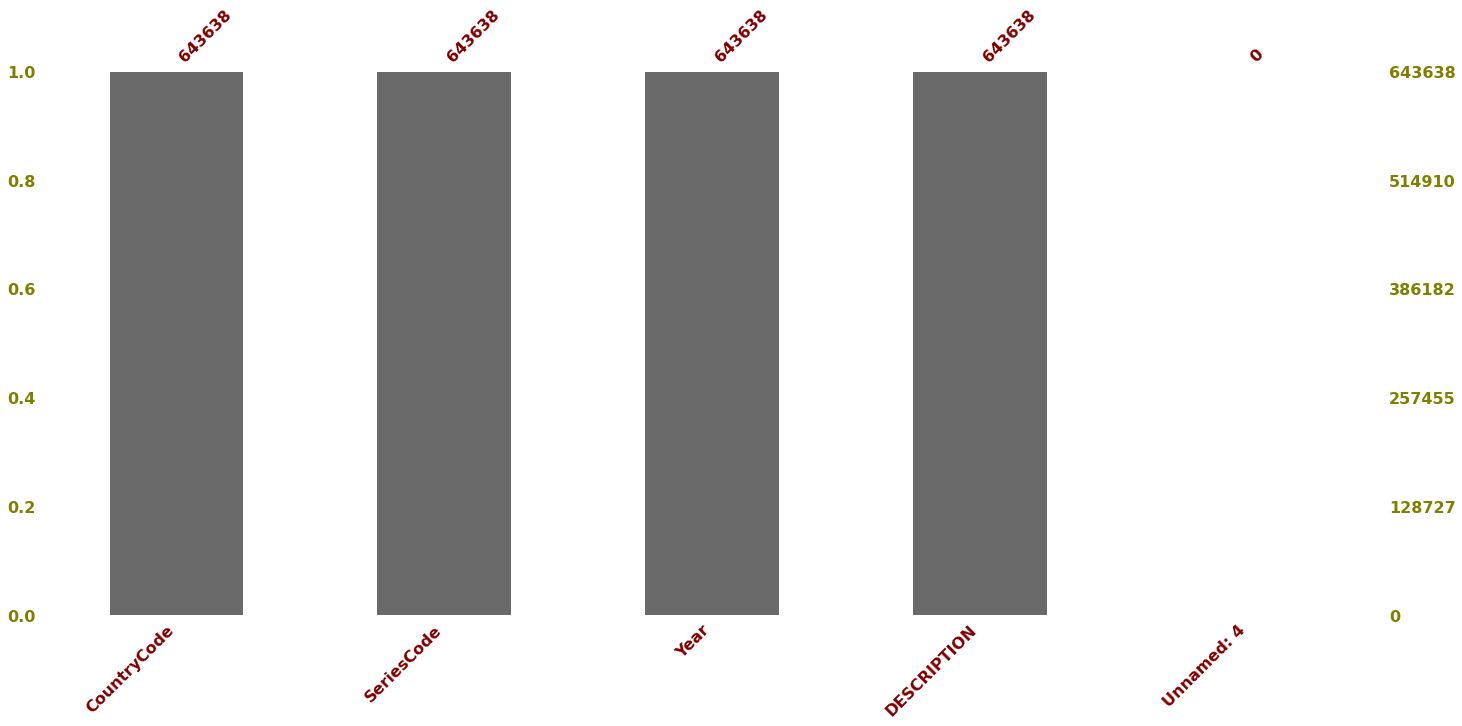

In [12]:
msno.bar(footnote);

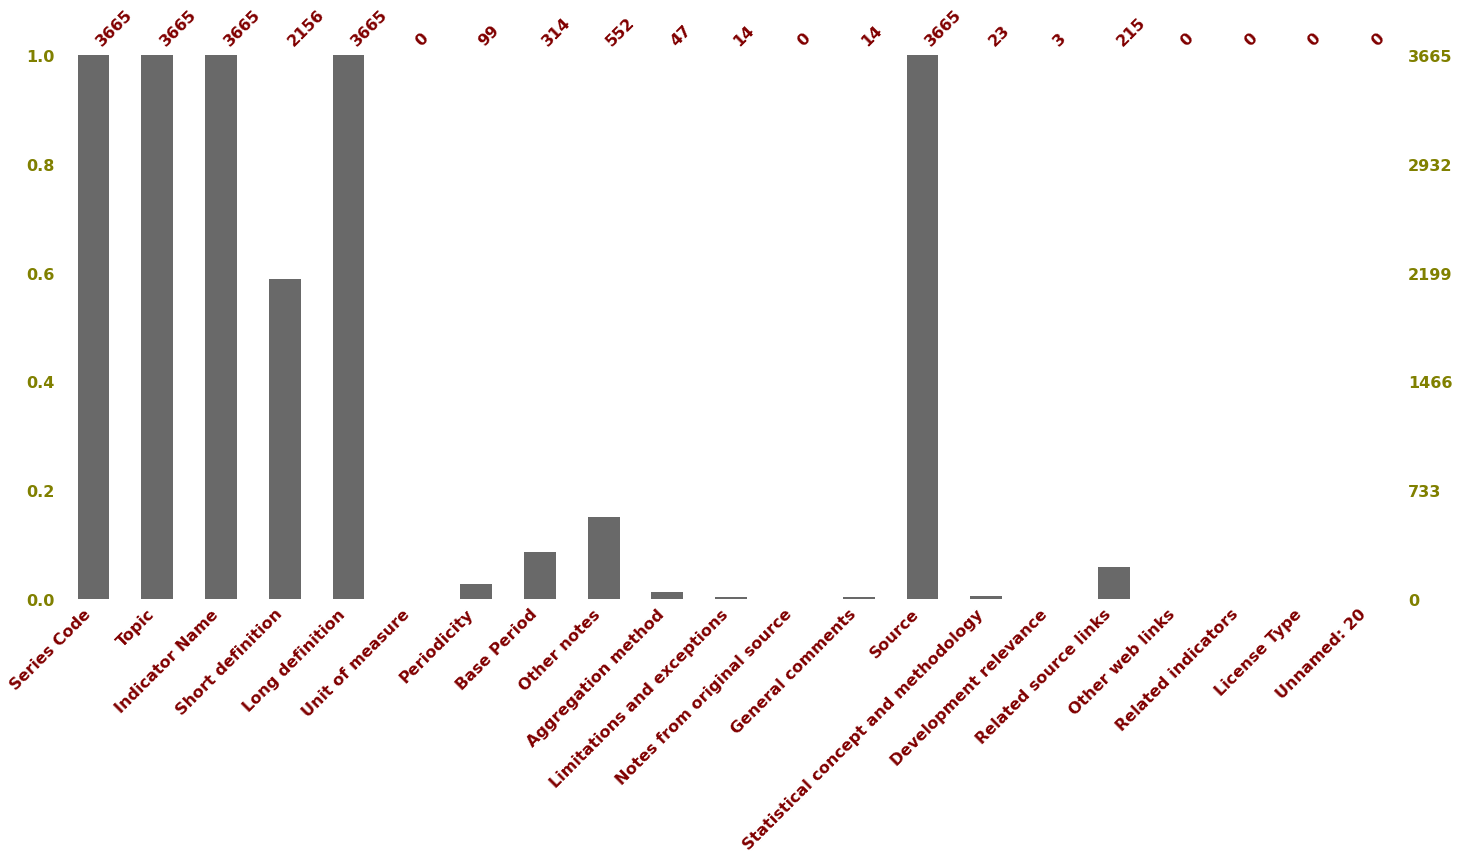

In [13]:
msno.bar(series);

### Percentage of Missing Values

In [14]:
dataframes = [country_series, country, data, footnote, series]

for df in dataframes:
    display(pd.DataFrame(df.isnull().sum()/len(df)*100, columns = ['% Missing']))

,% Missing
CountryCode,0.0
SeriesCode,0.0
DESCRIPTION,0.0
Unnamed: 3,100.0


,% Missing
Country Code,0.000000
Short Name,0.000000
Table Name,0.000000
Long Name,0.000000
2-alpha code,1.244813
Currency Unit,10.788382
Special Notes,39.834025
Region,11.203320
Income Group,11.203320
WB-2 code,0.414938


,% Missing
Country Name,0.000000
Country Code,0.000000
Indicator Name,0.000000
Indicator Code,0.000000
1970,91.849639
1971,95.993258
1972,95.984012
1973,95.992356
1974,95.971497
1975,90.156382


,% Missing
CountryCode,0.0
SeriesCode,0.0
Year,0.0
DESCRIPTION,0.0
Unnamed: 4,100.0


,% Missing
Series Code,0.000000
Topic,0.000000
Indicator Name,0.000000
Short definition,41.173261
Long definition,0.000000
Unit of measure,100.000000
Periodicity,97.298772
Base Period,91.432469
Other notes,84.938608
Aggregation method,98.717599


#### More steps to clean the data

1. Drop the Unmaned column in Country Series.
2. Drop columns in country where missing values are more than 75% which are
['National accounts reference year', 'Alternative conversion factor', 'Unnamed: 31']
3. In data, majority are missing values, but these are records for a particular year which we cant impute or even drop.
4. In footnote, we will drop Unamed:4
5. In series, we will drop 
['Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions',
'Notes from original source', 'General comments', 'Statistical concept and methodology', 'Development relevance', 
 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']

In [15]:
country_series.drop(['Unnamed: 3'], axis=1, inplace=True)
country.drop(['National accounts reference year', 'Alternative conversion factor', 'Unnamed: 31'], axis=1, inplace=True)
data.drop(['Unnamed: 69'], axis=1, inplace=True)
footnote.drop(['Unnamed: 4'], axis=1, inplace=True)
series.drop(['Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20'], axis=1, inplace=True)

### Drop duplicates

In [ ]:
country_series.drop_duplicates(inplace=True)
country.drop_duplicates(inplace=True)
data.drop_duplicates(inplace=True)
footnote.drop_duplicates(inplace=True)
series.drop_duplicates(inplace=True)

### Check for outliers in numerical data

In [20]:
# IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.
# Calculate IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
display(pd.DataFrame(IQR, columns = ['IQR']))

,IQR
1970,61.622500
1971,56543.146790
1972,58627.259080
1973,62019.404800
1974,63826.888405
1975,77.141628
1976,56818.687385
1977,57382.230087
1978,59394.250000
1979,64105.000000


As we now have the IQR scores, it’s time to get hold on outliers. 
The below code will give an output with some true and false values. 
The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [28]:
cols = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']

data_subset = data[cols]
display((data_subset < (Q1 - 1.5 * IQR)) & (data_subset > (Q3 + 1.5 * IQR)))

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
886926,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
886927,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
886928,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [52]:
outliers_dfcheck = (data_subset < (Q1 - 1.5 * IQR)) & (data_subset > (Q3 + 1.5 * IQR))
for col in outliers_dfcheck.columns: 
    outliers_dfcheck[col].value_counts()

False    886930
Name: 1970, dtype: int64

False    886930
Name: 1971, dtype: int64

False    886930
Name: 1972, dtype: int64

False    886930
Name: 1973, dtype: int64

False    886930
Name: 1974, dtype: int64

False    886930
Name: 1975, dtype: int64

False    886930
Name: 1976, dtype: int64

False    886930
Name: 1977, dtype: int64

False    886930
Name: 1978, dtype: int64

False    886930
Name: 1979, dtype: int64

False    886930
Name: 1980, dtype: int64

False    886930
Name: 1981, dtype: int64

False    886930
Name: 1982, dtype: int64

False    886930
Name: 1983, dtype: int64

False    886930
Name: 1984, dtype: int64

False    886930
Name: 1985, dtype: int64

False    886930
Name: 1986, dtype: int64

False    886930
Name: 1987, dtype: int64

False    886930
Name: 1988, dtype: int64

False    886930
Name: 1989, dtype: int64

False    886930
Name: 1990, dtype: int64

False    886930
Name: 1991, dtype: int64

False    886930
Name: 1992, dtype: int64

False    886930
Name: 1993, dtype: int64

False    886930
Name: 1994, dtype: int64

False    886930
Name: 1995, dtype: int64

False    886930
Name: 1996, dtype: int64

False    886930
Name: 1997, dtype: int64

False    886930
Name: 1998, dtype: int64

False    886930
Name: 1999, dtype: int64

False    886930
Name: 2000, dtype: int64

False    886930
Name: 2001, dtype: int64

False    886930
Name: 2002, dtype: int64

False    886930
Name: 2003, dtype: int64

False    886930
Name: 2004, dtype: int64

False    886930
Name: 2005, dtype: int64

False    886930
Name: 2006, dtype: int64

False    886930
Name: 2007, dtype: int64

False    886930
Name: 2008, dtype: int64

False    886930
Name: 2009, dtype: int64

False    886930
Name: 2010, dtype: int64

False    886930
Name: 2011, dtype: int64

False    886930
Name: 2012, dtype: int64

False    886930
Name: 2013, dtype: int64

False    886930
Name: 2014, dtype: int64

False    886930
Name: 2015, dtype: int64

False    886930
Name: 2016, dtype: int64

False    886930
Name: 2017, dtype: int64

False    886930
Name: 2020, dtype: int64

False    886930
Name: 2025, dtype: int64

False    886930
Name: 2030, dtype: int64

False    886930
Name: 2035, dtype: int64

False    886930
Name: 2040, dtype: int64

False    886930
Name: 2045, dtype: int64

False    886930
Name: 2050, dtype: int64

False    886930
Name: 2055, dtype: int64

False    886930
Name: 2060, dtype: int64

False    886930
Name: 2065, dtype: int64

False    886930
Name: 2070, dtype: int64

False    886930
Name: 2075, dtype: int64

False    886930
Name: 2080, dtype: int64

False    886930
Name: 2085, dtype: int64

False    886930
Name: 2090, dtype: int64

False    886930
Name: 2095, dtype: int64

False    886930
Name: 2100, dtype: int64

No Columns has outliers in data.

In [42]:
## Treating text Variables

country_series['DESCRIPTION_CLEANED'] = country_series['DESCRIPTION'].str.lower()
country_series['DESCRIPTION_CLEANED'] = country_series['DESCRIPTION'].str.strip() # remove leading and trailing whitespace.
country_series['DESCRIPTION_CLEANED'] = country_series['DESCRIPTION'].str.replace('\\.', '') # remove period.
country_series['DESCRIPTION_CLEANED'] = country_series['DESCRIPTION'].str.replace('\\Data sources : \\b', '') # replace apartment with apt.
country_series.drop(['DESCRIPTION'], inplace = True, axis = 1)
country_series

,CountryCode,SeriesCode,DESCRIPTION,DESCRIPTION_CLEANED
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,United Nations World Population Prospects
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,United Nations World Population Prospects
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...","Statistics South Africa, United Nations World ..."
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,Data sources: United Nations World Population ...
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,United Nations World Population Prospects
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,United Nations World Population Prospects


## Checking the Cleaned datasets

In [54]:
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION_CLEANED
0,ABW,SP.POP.TOTL,United Nations World Population Prospects
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,United Nations World Population Prospects


In [55]:
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,Robert J. Barro and Jong-Wha Lee: http://www.b...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,Robert J. Barro and Jong-Wha Lee: http://www.b...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,Robert J. Barro and Jong-Wha Lee: http://www.b...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...


In [56]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,Lending category,Other groups,System of National Accounts,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [58]:
footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.
